In [1]:
pip install transformers datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 98.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 18.9 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [2]:
from datasets import load_dataset
emotion = load_dataset('emotion')

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [3]:
train_ds = emotion['train']

In [4]:
import pandas as pd
emotion.set_format(type='pandas')

In [5]:
df = emotion['train'][:]

In [6]:
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [7]:
def label_int2str(row):
  return emotion['train'].features['label'].int2str(row)

In [8]:
df['label_name'] = df['label'].apply(label_int2str)

In [9]:
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [10]:
import matplotlib.pyplot as plt

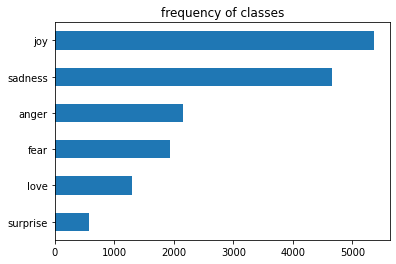

In [11]:
df['label_name'].value_counts(ascending=True).plot.barh()
plt.title('frequency of classes')
plt.show()

In [13]:
emotion.reset_format()

In [14]:
from transformers import AutoTokenizer
model_name = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name, max_length=70)

In [15]:
def tokenize(row):
  return tokenizer(row['text'], padding=True, truncation=True)

In [17]:
emotions_encoded = emotion.map(tokenize, batched=True, batch_size=32)

  0%|          | 0/500 [00:00<?, ?ba/s]

  0%|          | 0/63 [00:00<?, ?ba/s]

  0%|          | 0/63 [00:00<?, ?ba/s]

In [18]:
emotions_encoded['train']

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 16000
})

In [19]:
from transformers import TFAutoModel
import numpy as np

In [37]:
model = TFAutoModel.from_pretrained(model_name)

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_transform', 'activation_13', 'vocab_layer_norm', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [42]:
emotions_encoded.set_format('tensorflow', columns=emotions_encoded['train'].features)

In [43]:
emotions_encoded['train']['label']

<tf.Tensor: shape=(16000,), dtype=int64, numpy=array([0, 0, 3, ..., 1, 3, 0])>

In [44]:
from transformers import TFAutoModel

In [45]:
import tensorflow as tf

In [46]:
train_encoded_inputs = tokenizer(emotion['train']['text'],
                                 add_special_tokens = True,
                                 padding='max_length', 
                                 truncation=True, 
                                 max_length=70, 
                                 return_token_type_ids=False,
                                 return_tensors = 'tf')


In [112]:
def tokenize(data):
  return  tokenizer(data,
                    add_special_tokens = True,
                    padding='max_length', 
                    truncation=True, 
                    max_length=70, 
                    return_token_type_ids=False,
                    return_tensors = 'tf')

In [47]:
model = TFAutoModel.from_pretrained(model_name)

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_transform', 'activation_13', 'vocab_layer_norm', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [48]:
input1 = tf.keras.layers.Input(shape=(70,), dtype=tf.int32, name='input_ids')
input2 = tf.keras.layers.Input(shape=(70,), dtype=tf.int32, name='attention_ids')

In [49]:
output = model(input1, input2)[0]
output = tf.keras.layers.GlobalAveragePooling1D()(output)
output = tf.keras.layers.Dense(256, activation='tanh')(output)
output = tf.keras.layers.Dropout(0.3)(output)
output = tf.keras.layers.Dense(6, activation='softmax')(output)


In [50]:
mod = tf.keras.Model(inputs=[input1, input2], outputs=output)

In [51]:
mod.layers[2].trainable=True

In [52]:
mod.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [53]:
mod.fit({'input_ids': train_encoded_inputs['input_ids'], 'attention_ids': train_encoded_inputs['attention_mask']}, emotions_encoded['train']['label'], epochs=9, batch_size=64)

Epoch 1/9
250/250 [==============================] - 127s 433ms/step - loss: 0.4450 - accuracy: 0.8386
Epoch 2/9
250/250 [==============================] - 105s 421ms/step - loss: 0.1366 - accuracy: 0.9409
Epoch 3/9
250/250 [==============================] - 105s 419ms/step - loss: 0.1057 - accuracy: 0.9515
Epoch 4/9
250/250 [==============================] - 105s 420ms/step - loss: 0.0845 - accuracy: 0.9606
Epoch 5/9
250/250 [==============================] - 105s 419ms/step - loss: 0.0696 - accuracy: 0.9679
Epoch 6/9
250/250 [==============================] - 105s 418ms/step - loss: 0.0683 - accuracy: 0.9696
Epoch 7/9
250/250 [==============================] - 105s 419ms/step - loss: 0.0547 - accuracy: 0.9771
Epoch 8/9
250/250 [==============================] - 105s 418ms/step - loss: 0.0389 - accuracy: 0.9847
Epoch 9/9
250/250 [==============================] - 105s 419ms/step - loss: 0.0338 - accuracy: 0.9876


In [67]:
arr = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

In [109]:
t = tokenize(['we won the match'])

In [110]:
pred = mod.predict({'input_ids': t['input_ids'], 'attention_ids': t['attention_mask']})

1/1 [==============================] - 0s 92ms/step


In [111]:
arr[np.argmax(pred)]

'joy'